# Lab 3: Geometric Transformations

Manual geometric transformations on color images:
- Translation
- Rotation
- Scaling
- Shearing
- Combined Affine Transformations

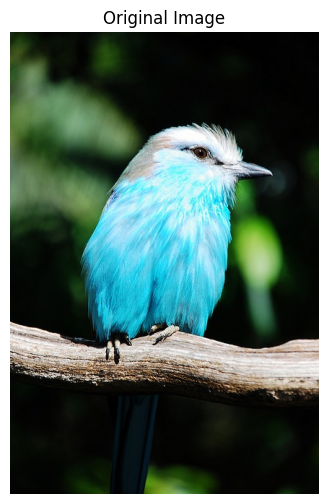

Image shape: (640, 428, 3)
We will use this color image for all transformations


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("bird.jpg")
# Convert from BGR to RGB for proper display
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the original image
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

print(f"Image shape: {img.shape}")
print("We will use this color image for all transformations")

Applying translation...


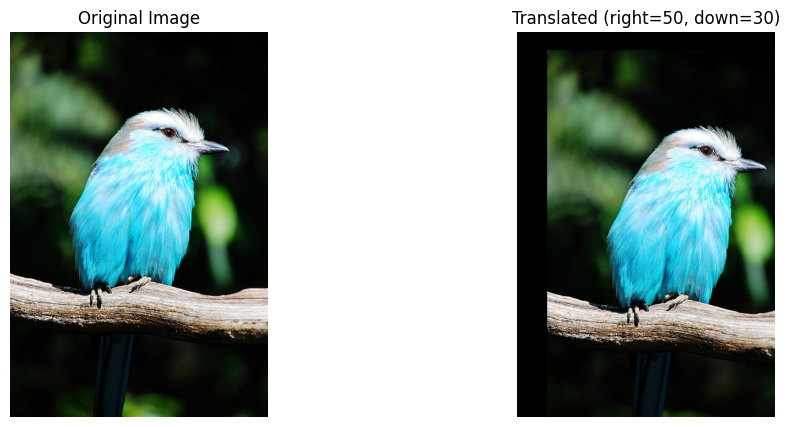

In [2]:
# Translation - Moving image by tx pixels right and ty pixels down
tx = 50  # move right
ty = 30  # move down

# Get image dimensions
height, width = img.shape[:2]

# Create empty result image
result = np.zeros_like(img)

print("Applying translation...")

# Go through each pixel in original image
for y in range(height):
    for x in range(width):
        # Calculate new position
        new_x = x + tx
        new_y = y + ty
        
        # Check if new position is within image bounds
        if new_x < width and new_y < height:
            # Copy pixel to new position
            result[new_y, new_x] = img[y, x]

# Show results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title(f"Translated (right={tx}, down={ty})")
plt.axis('off')
plt.show()

Rotating image by 30 degrees...


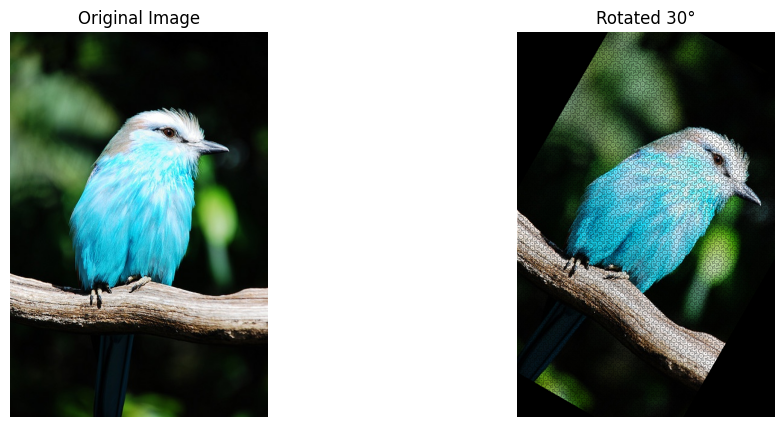

In [3]:
# Rotation - Rotating image around its center
angle = 30  # degrees

# Get image dimensions and center point
height, width = img.shape[:2]
center_x = width // 2
center_y = height // 2

# Convert angle to radians for math functions
angle_rad = np.radians(angle)
cos_angle = np.cos(angle_rad)
sin_angle = np.sin(angle_rad)

# Create empty result image
result = np.zeros_like(img)

print(f"Rotating image by {angle} degrees...")

# Go through each pixel in original image
for y in range(height):
    for x in range(width):
        # Step 1: Move origin to center of image
        x_centered = x - center_x
        y_centered = y - center_y
        
        # Step 2: Apply rotation
        new_x_centered = x_centered * cos_angle - y_centered * sin_angle
        new_y_centered = x_centered * sin_angle + y_centered * cos_angle
        
        # Step 3: Move back to original coordinate system
        new_x = int(new_x_centered + center_x)
        new_y = int(new_y_centered + center_y)
        
        # Check if new position is within image bounds
        if 0 <= new_x < width and 0 <= new_y < height:
            # Copy pixel to new position
            result[new_y, new_x] = img[y, x]

# Show results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title(f"Rotated {angle}°")
plt.axis('off')
plt.show()

Scaling image by 1.5x horizontally and 1.2x vertically...


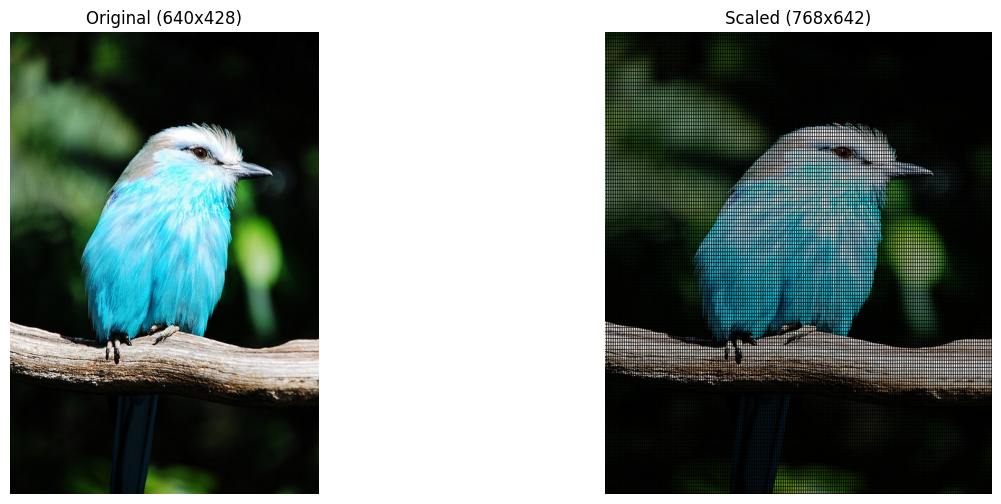

In [4]:
# Scaling - Making image bigger or smaller
scale_x = 1.5  # make 1.5 times wider
scale_y = 1.2  # make 1.2 times taller

# Get original image dimensions
height, width = img.shape[:2]

# Calculate new image size
new_width = int(width * scale_x)
new_height = int(height * scale_y)

# Create empty result image with new size
result = np.zeros((new_height, new_width, 3), dtype=img.dtype)

print(f"Scaling image by {scale_x}x horizontally and {scale_y}x vertically...")

# Go through each pixel in original image
for y in range(height):
    for x in range(width):
        # Calculate new position by multiplying with scale factors
        new_x = int(x * scale_x)
        new_y = int(y * scale_y)
        
        # Check if new position is within new image bounds
        if new_x < new_width and new_y < new_height:
            # Copy pixel to new position
            result[new_y, new_x] = img[y, x]

# Show results
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title(f"Original ({height}x{width})")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title(f"Scaled ({new_height}x{new_width})")
plt.axis('off')
plt.show()

Shearing image with factors: horizontal=0.3, vertical=0.1


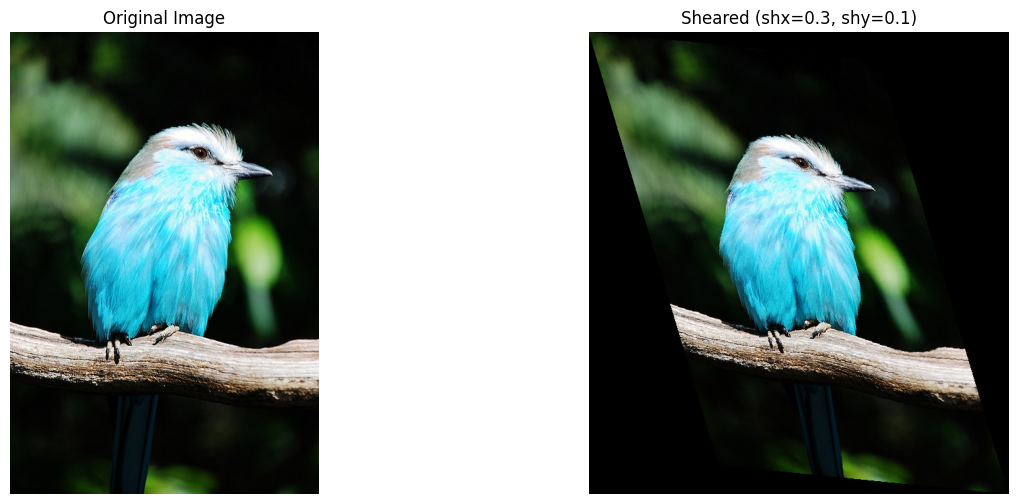

In [5]:
# Shearing - Making image slanted/skewed
shear_x = 0.3  # horizontal shear factor
shear_y = 0.1  # vertical shear factor

# Get image dimensions
height, width = img.shape[:2]

# Calculate new image size to fit the sheared image
new_width = width + int(abs(shear_x * height))
new_height = height + int(abs(shear_y * width))

# Create empty result image
result = np.zeros((new_height, new_width, 3), dtype=img.dtype)

print(f"Shearing image with factors: horizontal={shear_x}, vertical={shear_y}")

# Go through each pixel in original image
for y in range(height):
    for x in range(width):
        # Apply shearing transformation
        # New x = old x + (shear_x * old y)
        # New y = old y + (shear_y * old x)
        new_x = int(x + shear_x * y)
        new_y = int(y + shear_y * x)
        
        # Check if new position is within new image bounds
        if new_x < new_width and new_y < new_height:
            # Copy pixel to new position
            result[new_y, new_x] = img[y, x]

# Show results
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title(f"Sheared (shx={shear_x}, shy={shear_y})")
plt.axis('off')
plt.show()

Applying combined transformation: 45° rotation + translation (60, 40)


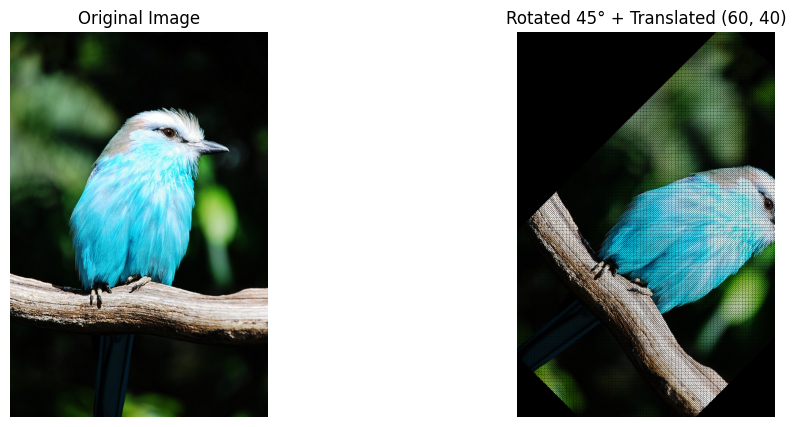

In [6]:
# Combined Transformation - Rotation + Translation together
angle = 45    # rotation in degrees
move_x = 60   # translation right
move_y = 40   # translation down

# Get image dimensions and center
height, width = img.shape[:2]
center_x = width // 2
center_y = height // 2

# Convert angle to radians
angle_rad = np.radians(angle)
cos_angle = np.cos(angle_rad)
sin_angle = np.sin(angle_rad)

# Create empty result image
result = np.zeros_like(img)

print(f"Applying combined transformation: {angle}° rotation + translation ({move_x}, {move_y})")

# Go through each pixel in original image
for y in range(height):
    for x in range(width):
        # Step 1: Move to center for rotation
        x_centered = x - center_x
        y_centered = y - center_y
        
        # Step 2: Apply rotation
        rotated_x = x_centered * cos_angle - y_centered * sin_angle
        rotated_y = x_centered * sin_angle + y_centered * cos_angle
        
        # Step 3: Move back from center
        x_after_rotation = rotated_x + center_x
        y_after_rotation = rotated_y + center_y
        
        # Step 4: Apply translation
        final_x = int(x_after_rotation + move_x)
        final_y = int(y_after_rotation + move_y)
        
        # Check if final position is within image bounds
        if 0 <= final_x < width and 0 <= final_y < height:
            # Copy pixel to final position
            result[final_y, final_x] = img[y, x]

# Show results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title(f"Rotated {angle}° + Translated ({move_x}, {move_y})")
plt.axis('off')
plt.show()

## How Manual Image Transformations Work

**Simple Explanation:**

Each transformation moves pixels from their original position to a new position using basic math formulas.

### 1. Translation (Moving the image)
- **Formula**: new_x = old_x + move_right, new_y = old_y + move_down
- **What it does**: Shifts the entire image to a new location

### 2. Rotation (Spinning the image)
- **Formulas**: 
  - new_x = old_x × cos(angle) - old_y × sin(angle)
  - new_y = old_x × sin(angle) + old_y × cos(angle)
- **What it does**: Spins the image around its center point

### 3. Scaling (Resizing the image)
- **Formula**: new_x = old_x × scale_factor_x, new_y = old_y × scale_factor_y
- **What it does**: Makes the image bigger or smaller

### 4. Shearing (Slanting the image)
- **Formulas**: 
  - new_x = old_x + (shear_factor × old_y)
  - new_y = old_y + (shear_factor × old_x)
- **What it does**: Makes the image look slanted or skewed

### 5. Combined Transformations
- **What it does**: Apply multiple transformations one after another
- **Example**: First rotate the image, then move it to a new position

**The Process:**
1. Go through every pixel in the original image
2. Calculate where that pixel should go using the transformation formula
3. Copy the pixel color to the new location
4. The result is the transformed image!